# AGN Model Demo


## Imports

In [11]:
import numpy as np
from lightning.agn import AGNModel
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ebm-dejavu')
%matplotlib inline

## Initialize Model

In [6]:
wave_grid = np.logspace(np.log10(0.912),
                        np.log10(100),
                        200)
filter_labels = ['SDSS_u', 'SDSS_g', 'SDSS_r', 'SDSS_i', 'SDSS_z',
                 'MOIRCS_J', 'MOIRCS_H', 'MOIRCS_Ks',
                 'IRAC_CH1', 'IRAC_CH2', 'IRAC_CH3', 'IRAC_CH4',
                 'MIPS_CH1']

redshift = 0.0

agn = AGNModel(filter_labels,
               redshift=redshift,
               wave_grid=wave_grid,
               polar_dust=True)

In [7]:
agn.print_params(verbose=True)


SKIRTOR-AGN
        Parameter Lo Hi                                       Description
----------------- -- -- -------------------------------------------------
SKIRTOR_log_L_AGN  6 15    Integrated luminosity of the model in log Lsun
 SKIRTOR_cosi_AGN  0  1    Cosine of the inclination to the line of sight
   SKIRTOR_tau_97  3 11 Edge-on optical depth of the torus at 9.7 microns
  polar_dust_tauV  0  3 V-band optical depth of the polar dust extinction

Total parameters: 4


## Plots with Varying Model Parameters

In [26]:
def multi_model_plot(params, cmap='YlOrRd', labels=None, ax=None):

    Nmod = params.shape[0]
    if labels is None: labels = [None for i in np.arange(Nmod)]

    lnu = agn.get_model_lnu_hires(params)

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure

    cm = mpl.colormaps[cmap]
    colors = cm(np.linspace(0.2, 0.9, Nmod))

    for i in np.arange(Nmod):

        ax.plot(agn.wave_grid_rest,
                agn.nu_grid_obs * lnu[i,:],
                color=colors[i],
                label=labels[i])

    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_xlabel(r'Rest-Frame Wavelength [$\rm \mu m$]')
    ax.set_ylabel(r'$\nu L_{\nu}\ [\rm L_{\odot}]$')

    if labels is not None: ax.legend(loc = 'best')

    return fig, ax
    

### Varying Inclination

The effects of the changing inclination are most pronounced at the sort of edge case, where $i \approx 90 - \Delta$, where $\Delta$ is the angle that the dusty torus cone extends upward from the plane of the accretion disk. It will often suffice to fit with inclination fixed or bounded to a small range (in fact this is the recommended strategy for e.g. Cigale) and compare the 'Type 1' and 'Type 2' fits.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Rest-Frame Wavelength [$\\rm \\mu m$]', ylabel='$\\nu L_{\\nu}\\ [\\rm L_{\\odot}]$'>)

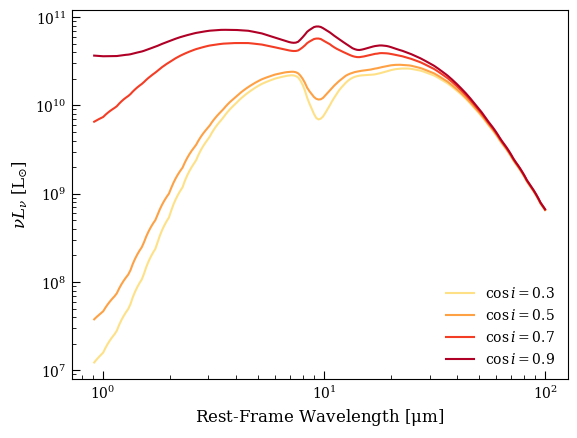

In [41]:
params = np.array([[11, 0.3, 7, 0.1],
                   [11, 0.5, 7, 0.1],
                   [11, 0.7, 7, 0.1],
                   [11, 0.9, 7, 0.1]])

multi_model_plot(params,
                 labels=[r'$\cos i = %.1f$' % p[1] for p in params])

### Varying $\tau_{9.7}$ at Fixed Inclination

Unless we have *really* good data across the MIR it seems unlikely that we could constrain both the inclination and optical depth.

Text(0.5, 1.0, "'Type 2' ($\\cos i = 0.3$) AGN")

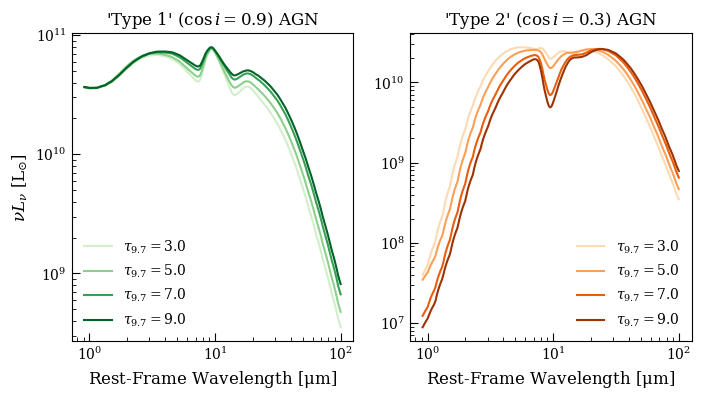

In [42]:
params1 = np.array([[11, 0.9, 3, 0.1],
                    [11, 0.9, 5, 0.1],
                    [11, 0.9, 7, 0.1],
                    [11, 0.9, 9, 0.1]])

params2 = np.array([[11, 0.3, 3, 0.1],
                    [11, 0.3, 5, 0.1],
                    [11, 0.3, 7, 0.1],
                    [11, 0.3, 9, 0.1]])

fig, axs = plt.subplots(1,2, figsize=(8,4))

multi_model_plot(params1,
                 cmap='Greens',
                 labels=[r'$\tau_{9.7} = %.1f$' % p[2] for p in params1],
                 ax=axs[0]
                 )

axs[0].set_title(r"'Type 1' ($\cos i = 0.9$) AGN")

multi_model_plot(params2,
                 cmap='Oranges',
                 labels=[r'$\tau_{9.7} = %.1f$' % p[2] for p in params2],
                 ax=axs[1]
                 )
axs[1].set_ylabel('')
axs[1].set_title(r"'Type 2' ($\cos i = 0.3$) AGN")

### Varying $\tau^{\rm pol}_V$ at Fixed Inclination

An optically-thick polar-dust obscurer can attenuate nearly all of the optical light from the face-on, 'Type 1' view. In the side-on, 'Type 2' view, we see none of that extra attenuation, but we do still see the isotropic, graybody dust re-emission of that attenuated optical light.

Text(0.5, 1.0, "'Type 2' ($\\cos i = 0.3$) AGN")

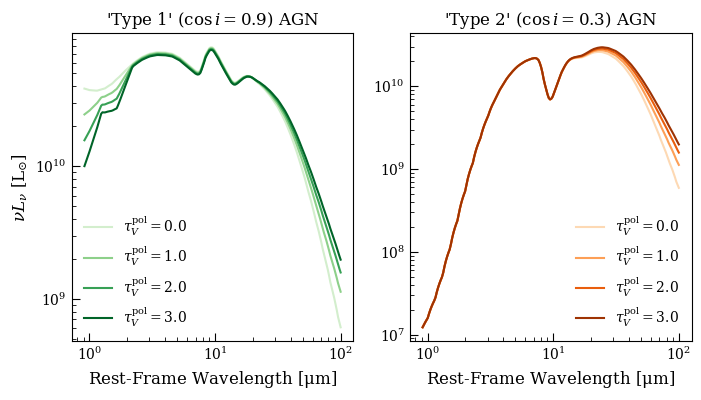

In [38]:
params1 = np.array([[11, 0.9, 7, 0.0],
                    [11, 0.9, 7, 1],
                    [11, 0.9, 7, 2],
                    [11, 0.9, 7, 3]])

params2 = np.array([[11, 0.3, 7, 0.0],
                    [11, 0.3, 7, 1],
                    [11, 0.3, 7, 2],
                    [11, 0.3, 7, 3]])

fig, axs = plt.subplots(1,2, figsize=(8,4))

multi_model_plot(params1,
                 cmap='Greens',
                 labels=[r'$\tau^{\rm pol}_{V} = %.1f$' % p[3] for p in params1],
                 ax=axs[0]
                 )

axs[0].set_title(r"'Type 1' ($\cos i = 0.9$) AGN")

multi_model_plot(params2,
                 cmap='Oranges',
                 labels=[r'$\tau^{\rm pol}_{V} = %.1f$' % p[3] for p in params2],
                 ax=axs[1]
                 )
axs[1].set_ylabel('')
axs[1].set_title(r"'Type 2' ($\cos i = 0.3$) AGN")